# Homework 2: NumPy Arrays

Name: Jordan Pinkava

Course: BMGT404

Section: 0202

Date: 2/22/2024

### Terp Savings & Loans

Terp Savings & Loans is a proud bank for the people of College Park, Maryland. In my new rule as an analyst for this wonderful bank, I am taking a deeper dive into the customer relationship management system to see what our clientele looks like and how we can better serve them. Below I will dissect the customer's backgrounds, spending habits, and more.

The first step to understanding my clientele is to obtain the necessary data related to the customers and use specific libraries that will help me dissect the data best. Today, we will use numpy, matplotlib, and seaborn to do so.

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. For all customers, load the variables relating to credit limit and revolving balance

We want to read in our columns related to credit limit and revolving balance, as that is what I am primarily interested in.

In [2]:
#read in the csv file that contains our credit card info that we are currently analyzing (credit limit and revolving balance)
credit_card_data = np.loadtxt(r"C:\Users\jpink\OneDrive\Desktop\BMGT404\HW2-credit-card-consumers.csv", skiprows = 1, usecols=(13, 14), delimiter=',')
print(credit_card_data)

[[12691.   777.]
 [ 8256.   864.]
 [ 3418.     0.]
 ...
 [ 5409.     0.]
 [ 5281.     0.]
 [10388.  1961.]]


2. Print the first 5 values for each variable

Lets take a look at the first five customers in this dataset! To get a quick view of this, we will slice the top 5 rows in both columns. 

In [3]:
#slicing to show only the first 5 rows for both variables
first5 = credit_card_data[:5, :]
print(f"The first 5 values for credit limit and revolving balance:\n Cred. Limit  Revolving Bal.\n {first5}")

The first 5 values for credit limit and revolving balance:
 Cred. Limit  Revolving Bal.
 [[12691.   777.]
 [ 8256.   864.]
 [ 3418.     0.]
 [ 3313.  2517.]
 [ 4716.     0.]]


3. Using only the data you have just loaded:



a. How many customers are represented in the data set?

To truly understand Terp Savings & Loans better, we need to know how many people are customers first. Here, I am getting the count of customers in our dataset.

In [4]:
#find the total count of customers represented in the dataset by using the size method to get the count of one column of data
cust_count = (credit_card_data[:, 0].size)
print(f'Terp Savings & Loans customer count in dataset: {cust_count}')

Terp Savings & Loans customer count in dataset: 10127


b. What is the highest credit limit offered to a single customer?

To figure out how much credit Terp Savings & Loans is offering, lets take a look at the highest credit limit offered. Good for them!

In [5]:
#find the highest credit card limit in the dataset by looking in the credit column and finding the maximum value 
highest_limit = (credit_card_data[:, 0]).max()
print(f'Highest credit card limit offered through Terp Savings & Loans: ${highest_limit}')

Highest credit card limit offered through Terp Savings & Loans: $34516.0


c. What is the total credit currently available for use across all customers?

Overall, I also want to know just how much credit TS&L offers to our entire customer base. (Hint: it is a lot!)

In [6]:
#create a variable that finds the total amount of credit available to all customers by grabbing from the credit column and getting the sum of it
total_credit = (credit_card_data[:, 0].sum())
print(f'Total credit currently available for all customers: ${total_credit}')

Total credit currently available for all customers: $87415795.1


d. What percentage of customers have a revolving balance less than the average revolving balance?

I am curious to know the average revolving balance across our customers and how many people have a balance less than the average. Lets see how many of our Terps are small spenders or not.

In [7]:
#create variables for average balance, number of customers with revolving balance less than the average, and the percentage of that
#these variables help us calculate what percentage of customers are small spenders
avg_balance = credit_card_data[:, 1].mean() 
num_cust_less = (credit_card_data[:, 1] < avg_balance).sum()
percent = (avg_balance/num_cust_less)*100

print(f"Average revolving balance: ${avg_balance:.2f}")
print("\n")
print(f"Number of customers that have a revolving balance less than avg: {num_cust_less}")
print("\n")
print(f"Percentage of customers that have a revolving balance less than the average revolving balance: {percent:.2f}%")
print("\n")

Average revolving balance: $1162.81


Number of customers that have a revolving balance less than avg: 4522


Percentage of customers that have a revolving balance less than the average revolving balance: 25.71%




From this point forward, you will need to review the data set to complete the remaining tasks. Hint: As you
are loading data, make sure you pay attention to the various function arguments available to you (covered
in lecture). Also note there is not just one "right" answer to many of these tasks. You are being graded on
your ability to provide data-driven analysis.

Going forward, I am going to be taking data from many different variables in the dataset. To make my analyses easier and more efficient, I created a function to easily get the column of interest when loading in my data. 

In [8]:
#function to load in the different columns from the dataset to make it easier to get our relevant variables
def load_data(column, data_type=float):
    credit_card_data = np.loadtxt(r'C:\Users\jpink\OneDrive\Desktop\BMGT404\HW2-credit-card-consumers.csv', skiprows=1, usecols=column, delimiter=',', dtype=data_type)
    return credit_card_data

4. Determine and print the frequency value and percentage for each level of education

I am very curious to know about our clientele's background, and understanding their education background is a good place to start. Now, we get a closer look at who our customers are. This can give me insights on intelligence, socioeconomic background, and potential salaries of my customer base.

In [9]:
#load in relevant dataset
education = load_data(5, "str")

#find the sum of all education levels
hs_counts = (education == "High School").sum()
graduate_counts = (education == "Graduate").sum()
college_count = (education == "College").sum()
unknown_count = (education == "Unknown").sum()
uneducated_count = (education == "Uneducated").sum()
post_grad_count = (education == "Post-Graduate").sum()
doctorate_count = (education == "Doctorate").sum()

#print a well-formatted table of the education level frequencies
print("Education Level Frequencies:")
print(f"Uneducated\tHigh School\tCollege\t\tPost-Grad\tGraduate\tDoctorate\tUnknown")
print(f"{uneducated_count}\t\t{hs_counts}\t\t{college_count}\t\t{post_grad_count}\t\t{graduate_counts}\t\t{doctorate_count}\t\t{unknown_count}")
print("\n")

#find the percentage of customers in each level of education
hs_percent = (hs_counts/cust_count)*100
grad_percent = (graduate_counts/cust_count)*100
coll_percent = (college_count/cust_count)*100
unknown_percent = (unknown_count/cust_count)*100
uned_percent = (uneducated_count/cust_count)*100
pg_percent = (post_grad_count/cust_count)*100
doc_percent = (doctorate_count/cust_count)*100

#print a well formatted table of education level percentages
print("Education Level Percentages:")
print(f"Uneducated\tHigh School\tCollege\t\tPost-Grad\tGraduate\tDoctorate\tUnknown")
print(f"{uned_percent:.2f}%\t\t{hs_percent:.2f}%\t\t{coll_percent:.2f}%\t\t{pg_percent:.2f}%\t\t{grad_percent:.2f}%\t\t{doc_percent:.2f}%\t\t{unknown_percent:.2f}%")


Education Level Frequencies:
Uneducated	High School	College		Post-Grad	Graduate	Doctorate	Unknown
1487		2013		1013		516		3128		451		1519


Education Level Percentages:
Uneducated	High School	College		Post-Grad	Graduate	Doctorate	Unknown
14.68%		19.88%		10.00%		5.10%		30.89%		4.45%		15.00%


5. From the resulting answer from #4, what inference can you make about the level of education for the
bank's customers?

Based on the results, the highest percentage of customers have a graduate degree. This tells us that the customer's are highly educated and because of the level degree they have, they might make stronger salaries than if they just had undergraduate degrees. 

6. Management has a perception of gender inequities in the customer base. Does the data support this perception?

It is important to know that TS&L serves across all identites. That includes gender! It is also important to make sure that there is a even distribution of customers, no matter their gender. Below, we will figure out whether or not we have gender inequities in our customer population.

In [10]:
#load in the correct variable
gender = load_data(3, "str")

#find the count of male customers and female customers in the dataset
male_count = (gender == 'M').sum()
female_count = (gender == 'F').sum()

#using the male/female count, we will find the percentage of how much each gender is represented by the bank
male_percentage = (male_count/cust_count)*100
female_percentage = (female_count/cust_count)*100

print(f"In the dataset, {male_count} customers are males, which is {male_percentage:.2f}%, and {female_count} customers are females, which is {female_percentage:.2f}%")

In the dataset, 4769 customers are males, which is 47.09%, and 5358 customers are females, which is 52.91%


Based on the data above, the perception is not completely accurate. There is a pretty reasonable spread of male and female customers at Terp Savings & Loans, with 47% of customers being male and 53% being female. Since there is just a 3% difference from being a 50/50 spread, I would say that Terp Savings & Loans has a great ratio between male and female customers using their bank.

7. Customers utilizing their credit, on average, less than 20% or greater than 80% pose a risk to the bank's
operations. What percentage of customers fall into this population? Explain why the bank may feel
there is a risk in this population. Then, using your explanation, what can you infer from the data?

As a bank, we want to help our customers do well and we also want to do well from how our customers utilize our bank. A way to understand this is by looking at average utilization ratios, which basically shows us how much our customers spend based on their credit limit. We look for a lower ratio, but not too low. Lets find out how our customers are utilizing their credit. 

In [11]:
#load in the correct variable
util_ratio = load_data(19)

#find the count of customers that have a low utilization ratio, then the count of customers with a high utilization ratio
low_ratio = (util_ratio < .20).sum()
high_ratio = (util_ratio > .80).sum()

#using those counts, we find what percentage of customers have low/high utilization ratios, and the total percent between the two
low_percent = (low_ratio/cust_count)*100
high_percent = (high_ratio/cust_count)*100
total_percent = low_percent+high_percent

print(f"{low_percent:.2f}% of customers utilize their credit less than 20%")
print("\n")
print(f"{high_percent:.2f}% of customers utilize their credit more than 80%")
print("\n")
print(f"In total, {total_percent:.2f}% of customers pose a risk to the banks operation because of their average utilization ratios ")

52.67% of customers utilize their credit less than 20%


4.61% of customers utilize their credit more than 80%


In total, 57.28% of customers pose a risk to the banks operation because of their average utilization ratios 


Terp Savings & Loans feels risk among these customer's utilization ratios because it impacts their credit scores and how the bank can handle one's money. For one, a high utilization ratio might indicate irresponible use of the credit available to them. Further, those who have very low utilization ratios may not be using their alloted credit enough, which also can be harmful to the bank they use and their credit. The more balanced a utilization ratio is, the better, for both the bank and the customer. 

Based on the data, 57% of customers pose a risk to Terp Savings & Loans' operations because of their utilization ratios. Having a high utilization score (above 80%) is more harmful, and only 4.6% of customers are in that range, which is good. Though, 52% have a low utilization score, which is not perfect either. The 52% that have a low utilization score should focus on reaching at least 20% of their alloted credit every month in order to (potentially) improve their credit score, as well as help the bank that supports their credit. 

8. Management wants to put out an ad campaign to attract new customers. Which income range should
they target? Why?

TS&L wants to reach all customers across all incomes. College Park is a diverse area and we can hopefully reach as wide a range as possible. Our marketing team is relying on me to provide them with insights on which income ranges they should focus on.

In [12]:
#load in relevant dataset
income_range = load_data(7, "str")

#find the sum of all income ranges
unknown = (income_range == "Unknown").sum()
lowest_range = (income_range == "Less than $40K").sum()
lower_mid_range = (income_range == "$40K - $60K").sum()
mid_range = (income_range == "$60K - $80K").sum()
higher_mid_range = (income_range == "$80K - $120K").sum()
highest_range = (income_range == "$120K +").sum()

#print a well-formatted table of the income range frequencies
print("Income Range Frequencies:")
print(f"Unknown\t\tLess than $40K\t\t$40K - $60K\t\t$60K - $80K\t$80K - $120K\t$120K +")
print(f"{unknown}\t\t{lowest_range}\t\t\t{lower_mid_range}\t\t\t{mid_range}\t\t{higher_mid_range}\t\t{highest_range}")
print("\n")

#find the percentage of customers in each income range
unknownP = (unknown/cust_count)*100
lowest_percent = (lowest_range/cust_count)*100
low_mid_percent = (lower_mid_range/cust_count)*100
mid_percent = (mid_range/cust_count)*100
high_mid_percent = (higher_mid_range/cust_count)*100
highest_percent = (highest_range/cust_count)*100

#print a well formatted table of income range percentages
print("Income Range Percentages:")
print(f"Unknown\t\tLess than $40K\t\t$40K - $60K\t\t$60K - $80K\t$80K - $120K\t$120K +")
print(f"{unknownP:.2f}%\t\t{lowest_percent:.2f}%\t\t\t{low_mid_percent:.2f}%\t\t\t{mid_percent:.2f}%\t\t{high_mid_percent:.2f}%\t\t{highest_percent:.2f}%")


Income Range Frequencies:
Unknown		Less than $40K		$40K - $60K		$60K - $80K	$80K - $120K	$120K +
1112		3561			1790			1402		1535		727


Income Range Percentages:
Unknown		Less than $40K		$40K - $60K		$60K - $80K	$80K - $120K	$120K +
10.98%		35.16%			17.68%			13.84%		15.16%		7.18%


Based on the data above, the income ranges that should be targeted is $120,000 and above. 35% of the customer base makes less than 40,000 dollars a year, which tells us that getting customers with higher incomes would be beneficial to Terp Savings & Loans. Only 7% of customers have incomes above 120,000 dollars, and reaching that income range and growing it will help diversify the income ranges the bank reaches. 

9. Create a data visualization displaying customer age vs. number of customers of that age

Numerical python is cool... but being able to visualize all my hard work and my clientele is pretty cool, too. Now, I am going to create some graphs that gives insight on our customers ages. Lets see what age loves TS&L more than the rest!

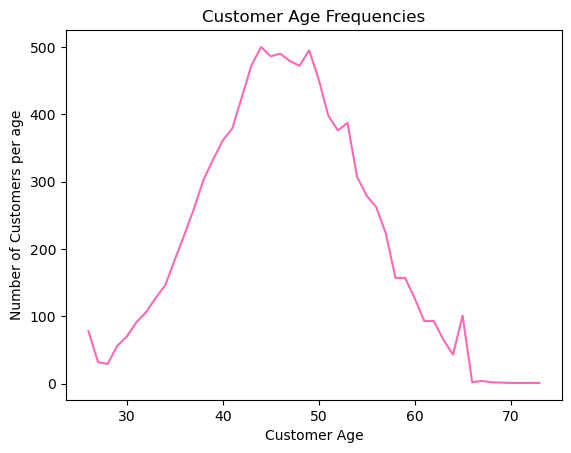

In [13]:
#line graph using matplotlib
#load in relevant data
cust_age = load_data(2)

#get the customer ages and return the counts for the frequencies of those ages
unique_ages, age_counts = np.unique(cust_age, return_counts=True)

#y will be numbers of customers that age (frequency)
#x will be customer age (values)
x = unique_ages
y = age_counts

#graph labels and aesthetics
plt.title('Customer Age Frequencies')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers per age')
plt.plot(x, y, color='hotpink')
plt.show()

[Text(0.5, 0, 'Customer Age'), Text(0, 0.5, 'Number of Customers Per Age')]

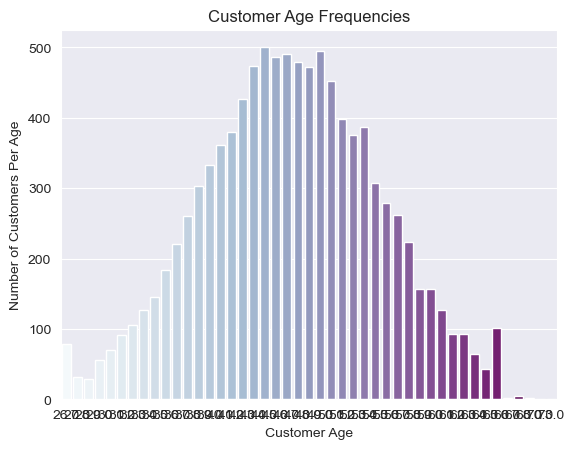

In [14]:
#now we will create a barplot using seaborn!

#graph labels/titles and aesthetics, using variables declared in previous cell
sns.set_style("darkgrid")
axes = sns.barplot(x = unique_ages, y = age_counts, palette = "BuPu")
axes.set_title("Customer Age Frequencies")
axes.set(xlabel ="Customer Age", ylabel = "Number of Customers Per Age")

10. From the resulting data visualization from #9, what inference can you make about the age of the
customer base?


Based on the visualizations made in problem #9, there is a normal distribution of customers that use Terp Savings & Loans. Further, the average customer age is likely between 40 and 50 years old, which we can tell by the shape of the distribution. The ages range from mid-twenties to early-seventies, but the majority of people that use Terp Savings & Loans are between 40 and 50 years old.  

"I pledge on my honor that I have not given nor received any unauthorized
assistance on this assignment."


Jordan Pinkava